In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np

from patsy import dmatrices
import statsmodels.api as sm

import sklearn.metrics as metrics

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# SETUP


In [ ]:
!ls

MyDrive  Shareddrives


In [ ]:
%cd MyDrive

/content/gdrive/MyDrive


In [4]:
DATA_PATH = "/content/gdrive/MyDrive/MS-Data-Science/210-Capstone/w210_group_folder/"

In [5]:
evictions = pd.read_csv(DATA_PATH+"/capstone_data/evictions/dallas_houston_evictions_ACS_10_19.csv")

In [6]:
evictions.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48113000100,0.0,2010,0,2010-01-03,215.0,1037.011173,144.0,0.0,0.0,168.0,170.0,49.0
1,1,48113000201,0.0,2010,0,2010-01-03,0.0,1080.827068,216.0,0.0,0.0,55.0,184.0,24.0
2,2,48113000202,0.0,2010,0,2010-01-03,48.0,1065.116279,94.0,0.0,0.0,363.0,165.0,33.0
3,3,48113000300,0.0,2010,0,2010-01-03,22.0,1400.845666,333.0,0.0,0.0,681.0,302.0,52.0
4,4,48113000401,0.0,2010,0,2010-01-03,103.0,872.812500,1320.0,0.0,0.0,321.0,59.0,252.0


In [7]:
evictions.shape

(460404, 14)

Tracts
Intro slide: 48113018205

(old)
NBEATS good, BRNN bad: 48201980000
NBEATS good, BRNN bad: 48201410300

NBEATS bad, BRNN good: 48113001900
NBEATS bad, BRNN good: 48113020500




# Tract 1: 48113018205

intro slide: 48113018205

In [ ]:
geoid1 = evictions.loc[evictions['GEOID'] == 48113018205]

In [ ]:
geoid1.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
449,449,48113018205,0.0,2010,0,2010-01-03,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
1331,1836,48113018205,0.0,2010,1,2010-01-10,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
2213,3223,48113018205,1.0,2010,2,2010-01-17,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
3095,4610,48113018205,0.0,2010,3,2010-01-24,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
3977,5997,48113018205,1.0,2010,4,2010-01-31,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0


In [ ]:
geoid1.shape

(522, 14)

Text(0.5, 1.0, 'Evictions by Week')

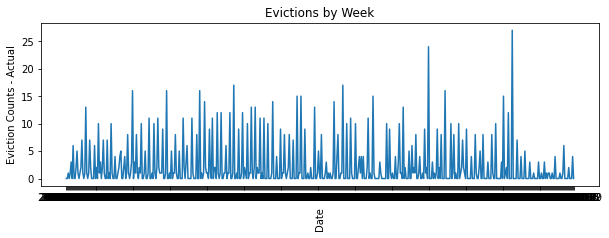

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
ax.plot(geoid1['week_dt'],geoid1['count'])

ax.set_xlabel("Date", rotation=90)
ax.set_ylabel("Eviction Counts - Actual")
ax.set_title("Evictions by Week")

In [ ]:
geoid1.reset_index(inplace=True)

In [ ]:
geoid1.head()

,index,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,449,449,48113018205,0.0,2010,0,2010-01-03,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
1,1331,1836,48113018205,0.0,2010,1,2010-01-10,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
2,2213,3223,48113018205,1.0,2010,2,2010-01-17,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
3,3095,4610,48113018205,0.0,2010,3,2010-01-24,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
4,3977,5997,48113018205,1.0,2010,4,2010-01-31,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0


In [ ]:
geoid1 = geoid1.drop('Unnamed: 0',axis=1)

In [ ]:
geoid1.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48113018205,0.0,2010,0,2010-01-03,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
1,1,48113018205,0.0,2010,1,2010-01-10,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
2,2,48113018205,1.0,2010,2,2010-01-17,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
3,3,48113018205,0.0,2010,3,2010-01-24,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
4,4,48113018205,1.0,2010,4,2010-01-31,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0


In [ ]:
geoid1 = geoid1.rename(columns={'index':'week_continuous'})

In [ ]:
geoid1.head()

,week_continuous,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48113018205,0.0,2010,0,2010-01-03,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
1,1,48113018205,0.0,2010,1,2010-01-10,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
2,2,48113018205,1.0,2010,2,2010-01-17,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
3,3,48113018205,0.0,2010,3,2010-01-24,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0
4,4,48113018205,1.0,2010,4,2010-01-31,397.0,823.816568,1326.0,0.0,0.0,648.0,78.0,146.0


In [ ]:
geoid1.columns

Index(['week_continuous', 'GEOID', 'count', 'year', 'week', 'week_dt',
       'SE_A03001_003', 'SE_A18005_001', 'SE_A06001_005', 'SE_B18002_002',
       'SE_B18002_003', 'SE_A08002B_003', 'SE_A10011_003', 'SE_A10039B_009'],
      dtype='object')

In [ ]:
mask = np.random.rand(len(geoid1)) < 0.8

geoid1_train = geoid1[mask]
geoid1_test = geoid1[~mask]
print('Training data set length = '+str(len(geoid1_train)))
print('Testing data set length = '+str(len(geoid1_test)))

Training data set length = 419
Testing data set length = 103


In [ ]:
expr = """ count ~ week_continuous """

In [ ]:
y_train1, X_train1 = dmatrices(expr, geoid1_train, return_type='dataframe')
y_test1, X_test1 = dmatrices(expr, geoid1_test, return_type='dataframe')

In [ ]:
poisson_training_results1 = sm.GLM(y_train1, X_train1, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  419
Model:                            GLM   Df Residuals:                      417
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1371.4
Date:                Thu, 02 Dec 2021   Deviance:                       2165.8
Time:                        02:36:08   Pearson chi2:                 2.97e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0559      0.062     

In [ ]:
poisson_predictions1 = poisson_training_results1.get_prediction(X_test1)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame1 = poisson_predictions1.summary_frame()
print(predictions_summary_frame1)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    2.874577  0.178181       2.545728       3.245906
4    2.861627  0.175243       2.537968       3.226560
16   2.823125  0.166631       2.514717       3.169356
21   2.807235  0.163132       2.505038       3.145888
24   2.797745  0.161059       2.499233       3.131911
..        ...       ...            ...            ...
493  1.647721  0.108334       1.448502       1.874339
502  1.631066  0.110057       1.429013       1.861687
507  1.621886  0.111004       1.418283       1.854717
512  1.612757  0.111944       1.407621       1.847789
516  1.605492  0.112691       1.399141       1.842275

[103 rows x 4 columns]


In [ ]:
predicted_counts1 = predictions_summary_frame1['mean']
actual_counts1 = y_test1['count']

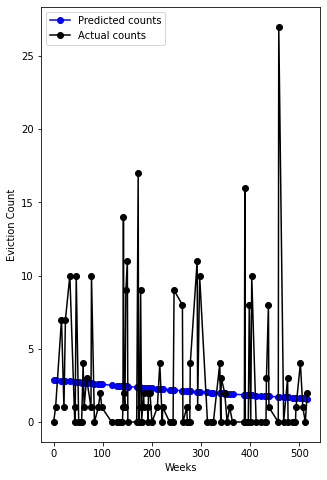

In [ ]:
fig.suptitle('Poi(GEOID:48113018205)')
plt.figure(figsize=(5,8))
predicted1, = plt.plot(X_test1.index, predicted_counts1, c='blue', marker='o',label='Predicted counts')
actual1, = plt.plot(X_test1.index, actual_counts1, c='black', marker='o',label='Actual counts')
plt.legend(handles=[predicted1, actual1])
plt.xlabel("Weeks")
plt.ylabel("Eviction Count")
plt.show()

# Tract 2: 48201980000


NBEATS good, BRNN bad: 48201980000

In [ ]:
geoid2 = evictions.loc[evictions['GEOID'] == 48201980000]

In [ ]:
geoid2.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
881,1384,48201980000,0.0,2010,0,2010-01-03,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1763,2771,48201980000,0.0,2010,1,2010-01-10,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2645,4158,48201980000,0.0,2010,2,2010-01-17,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3527,5545,48201980000,0.0,2010,3,2010-01-24,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
4409,6932,48201980000,0.0,2010,4,2010-01-31,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
geoid2.shape

(522, 14)

Text(0.5, 1.0, 'Evictions by Week')

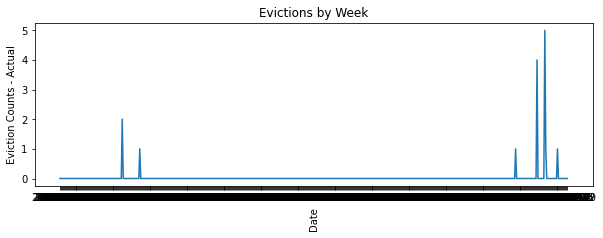

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
ax.plot(geoid2['week_dt'],geoid2['count'])

ax.set_xlabel("Date", rotation=90)
ax.set_ylabel("Eviction Counts - Actual")
ax.set_title("Evictions by Week")

In [ ]:
geoid2.reset_index(inplace=True)

In [ ]:
geoid2.head()

,index,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,881,1384,48201980000,0.0,2010,0,2010-01-03,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1,1763,2771,48201980000,0.0,2010,1,2010-01-10,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,2645,4158,48201980000,0.0,2010,2,2010-01-17,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3,3527,5545,48201980000,0.0,2010,3,2010-01-24,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
4,4409,6932,48201980000,0.0,2010,4,2010-01-31,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
geoid2 = geoid2.drop('index',axis=1)

In [ ]:
geoid2.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,1384,48201980000,0.0,2010,0,2010-01-03,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1,2771,48201980000,0.0,2010,1,2010-01-10,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,4158,48201980000,0.0,2010,2,2010-01-17,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3,5545,48201980000,0.0,2010,3,2010-01-24,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
4,6932,48201980000,0.0,2010,4,2010-01-31,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
geoid2 = geoid2.drop('Unnamed: 0',axis=1)

In [ ]:
geoid2.reset_index(inplace=True)

In [ ]:
geoid2.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201980000,0.0,2010,0,2010-01-03,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1,1,48201980000,0.0,2010,1,2010-01-10,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,2,48201980000,0.0,2010,2,2010-01-17,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3,3,48201980000,0.0,2010,3,2010-01-24,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
4,4,48201980000,0.0,2010,4,2010-01-31,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
geoid2 = geoid2.rename(columns={'index':'week_continuous'})
geoid2.head()

,week_continuous,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201980000,0.0,2010,0,2010-01-03,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1,1,48201980000,0.0,2010,1,2010-01-10,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,2,48201980000,0.0,2010,2,2010-01-17,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3,3,48201980000,0.0,2010,3,2010-01-24,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
4,4,48201980000,0.0,2010,4,2010-01-31,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mask = np.random.rand(len(geoid2)) < 0.8

geoid2_train = geoid2[mask]
geoid2_test = geoid2[~mask]
print('Training data set length = '+str(len(geoid2_train)))
print('Testing data set length = '+str(len(geoid2_test)))

Training data set length = 406
Testing data set length = 116


In [ ]:
expr = """ count ~ week_continuous """

In [ ]:
y_train2, X_train2 = dmatrices(expr, geoid2_train, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr, geoid2_test, return_type='dataframe')

In [ ]:
poisson_training_results2 = sm.GLM(y_train2, X_train2, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  406
Model:                            GLM   Df Residuals:                      404
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51.508
Date:                Thu, 02 Dec 2021   Deviance:                       88.270
Time:                        02:52:12   Pearson chi2:                 5.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.06754
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.7898      2.153     

In [ ]:
poisson_predictions2 = poisson_training_results2.get_prediction(X_test2)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame2 = poisson_predictions2.summary_frame()
print(predictions_summary_frame2)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.000056  0.000121   8.242212e-07       0.003808
8    0.000064  0.000135   1.007247e-06       0.004031
10   0.000066  0.000139   1.059029e-06       0.004089
17   0.000074  0.000153   1.262129e-06       0.004298
22   0.000080  0.000164   1.430622e-06       0.004454
..        ...       ...            ...            ...
480  0.126859  0.036679   7.198000e-02       0.223578
487  0.141987  0.042578   7.888538e-02       0.255563
492  0.153884  0.047610   8.391585e-02       0.282192
501  0.177869  0.058681   9.317035e-02       0.339565
518  0.233841  0.088444   1.114236e-01       0.490756

[116 rows x 4 columns]


In [ ]:
predicted_counts2 = predictions_summary_frame2['mean']
actual_counts2 = y_test2['count']

# Tract 3: 48201410300



NBEATS good, BRNN bad: 48201410300

In [ ]:
geoid3 = evictions.loc[evictions['GEOID'] == 48201410300]

In [ ]:
geoid3.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
689,852,48201410300,0.0,2010,0,2010-01-03,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
1571,2239,48201410300,0.0,2010,1,2010-01-10,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
2453,3626,48201410300,1.0,2010,2,2010-01-17,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
3335,5013,48201410300,0.0,2010,3,2010-01-24,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
4217,6400,48201410300,1.0,2010,4,2010-01-31,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0


In [ ]:
geoid3.shape

(522, 14)

Text(0.5, 1.0, 'Evictions by Week')

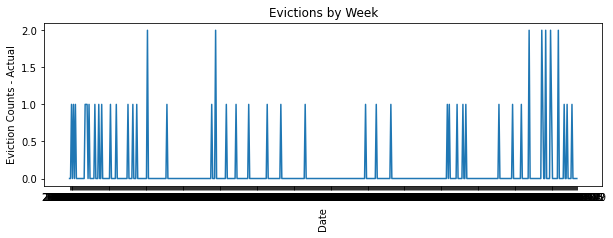

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
ax.plot(geoid3['week_dt'],geoid3['count'])

ax.set_xlabel("Date", rotation=90)
ax.set_ylabel("Eviction Counts - Actual")
ax.set_title("Evictions by Week")

In [ ]:
geoid3.reset_index(inplace=True)

In [ ]:
geoid3.head()

,index,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,689,852,48201410300,0.0,2010,0,2010-01-03,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
1,1571,2239,48201410300,0.0,2010,1,2010-01-10,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
2,2453,3626,48201410300,1.0,2010,2,2010-01-17,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
3,3335,5013,48201410300,0.0,2010,3,2010-01-24,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
4,4217,6400,48201410300,1.0,2010,4,2010-01-31,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0


In [ ]:
geoid3 = geoid3.drop('index',axis=1)

In [ ]:
geoid3.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,852,48201410300,0.0,2010,0,2010-01-03,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
1,2239,48201410300,0.0,2010,1,2010-01-10,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
2,3626,48201410300,1.0,2010,2,2010-01-17,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
3,5013,48201410300,0.0,2010,3,2010-01-24,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
4,6400,48201410300,1.0,2010,4,2010-01-31,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0


In [ ]:
geoid3 = geoid3.drop('Unnamed: 0',axis=1)

In [ ]:
geoid3.reset_index(inplace=True)

In [ ]:
geoid3.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201410300,0.0,2010,0,2010-01-03,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
1,1,48201410300,0.0,2010,1,2010-01-10,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
2,2,48201410300,1.0,2010,2,2010-01-17,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
3,3,48201410300,0.0,2010,3,2010-01-24,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
4,4,48201410300,1.0,2010,4,2010-01-31,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0


In [ ]:
geoid3 = geoid3.rename(columns={'index':'week_continuous'})
geoid3.head()

,week_continuous,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201410300,0.0,2010,0,2010-01-03,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
1,1,48201410300,0.0,2010,1,2010-01-10,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
2,2,48201410300,1.0,2010,2,2010-01-17,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
3,3,48201410300,0.0,2010,3,2010-01-24,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0
4,4,48201410300,1.0,2010,4,2010-01-31,92.0,1263.305979,183.0,0.0,0.0,279.0,128.0,161.0


In [ ]:
mask = np.random.rand(len(geoid3)) < 0.8

geoid3_train = geoid3[mask]
geoid3_test = geoid3[~mask]
print('Training data set length = '+str(len(geoid3_train)))
print('Testing data set length = '+str(len(geoid3_test)))

Training data set length = 422
Testing data set length = 100


In [ ]:
expr = """ count ~ week_continuous """

In [ ]:
y_train3, X_train3 = dmatrices(expr, geoid3_train, return_type='dataframe')
y_test3, X_test3 = dmatrices(expr, geoid3_test, return_type='dataframe')

In [ ]:
poisson_training_results3 = sm.GLM(y_train3, X_train3, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  422
Model:                            GLM   Df Residuals:                      420
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.87
Date:                Thu, 02 Dec 2021   Deviance:                       204.68
Time:                        02:52:56   Pearson chi2:                     477.
No. Iterations:                     6   Pseudo R-squ. (CS):          0.0008603
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.4992      0.326     

In [ ]:
poisson_predictions3 = poisson_training_results3.get_prediction(X_test3)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame3 = poisson_predictions3.summary_frame()
print(predictions_summary_frame3)

         mean   mean_se  mean_ci_lower  mean_ci_upper
5    0.082413  0.026480       0.043903       0.154700
6    0.082465  0.026421       0.044010       0.154519
14   0.082884  0.025948       0.044873       0.153092
17   0.083041  0.025771       0.045200       0.152564
24   0.083410  0.025356       0.045968       0.151349
..        ...       ...            ...            ...
510  0.113458  0.033478       0.063632       0.202301
511  0.113530  0.033600       0.063561       0.202783
515  0.113818  0.034093       0.063276       0.204730
517  0.113962  0.034341       0.063134       0.205712
519  0.114107  0.034590       0.062991       0.206701

[100 rows x 4 columns]


In [ ]:
predicted_counts3 = predictions_summary_frame3['mean']
actual_counts3 = y_test3['count']

# Tract 4: 48201420800


NBEATS good, BRNN bad: 48201420800

In [ ]:
geoid4 = evictions.loc[evictions['GEOID'] == 48201420800]

In [ ]:
geoid4.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
709,906,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1591,2293,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2473,3680,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3355,5067,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4237,6454,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [ ]:
geoid4.shape

(522, 14)

Text(0.5, 1.0, 'Evictions by Week')

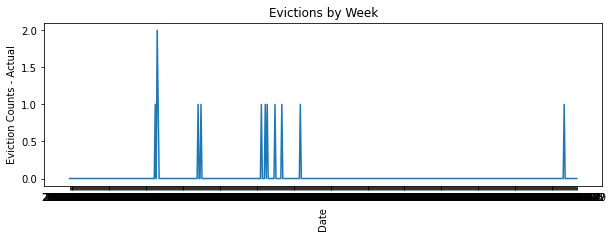

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
ax.plot(geoid4['week_dt'],geoid4['count'])

ax.set_xlabel("Date", rotation=90)
ax.set_ylabel("Eviction Counts - Actual")
ax.set_title("Evictions by Week")

In [ ]:
geoid4.reset_index(inplace=True)

In [ ]:
geoid4.head()

,index,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,709,906,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1,1591,2293,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2,2473,3680,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3,3355,5067,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4,4237,6454,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [ ]:
geoid4 = geoid4.drop('index',axis=1)

In [ ]:
geoid4.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,906,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1,2293,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2,3680,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3,5067,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4,6454,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [ ]:
geoid4 = geoid4.drop('Unnamed: 0',axis=1)

In [ ]:
geoid4.reset_index(inplace=True)

In [ ]:
geoid4.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1,1,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2,2,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3,3,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4,4,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [ ]:
geoid4 = geoid4.rename(columns={'index':'week_continuous'})
geoid4.head()

,week_continuous,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1,1,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2,2,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3,3,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4,4,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [ ]:
mask = np.random.rand(len(geoid4)) < 0.8

geoid4_train = geoid4[mask]
geoid4_test = geoid4[~mask]
print('Training data set length = '+str(len(geoid4_train)))
print('Testing data set length = '+str(len(geoid4_test)))

Training data set length = 420
Testing data set length = 102


In [ ]:
expr = """ count ~ week_continuous """

In [ ]:
y_train4, X_train4 = dmatrices(expr, geoid4_train, return_type='dataframe')
y_test4, X_test4 = dmatrices(expr, geoid4_test, return_type='dataframe')

In [ ]:
poisson_training_results4 = sm.GLM(y_train4, X_train4, family=sm.families.Poisson()).fit()

In [ ]:
print(poisson_training_results4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  420
Model:                            GLM   Df Residuals:                      418
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43.174
Date:                Thu, 02 Dec 2021   Deviance:                       69.734
Time:                        02:48:18   Pearson chi2:                     466.
No. Iterations:                     7   Pseudo R-squ. (CS):           0.005256
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.0829      0.557     

In [ ]:
poisson_predictions4 = poisson_training_results4.get_prediction(X_test4)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame4 = poisson_predictions4.summary_frame()
print(predictions_summary_frame4)

         mean   mean_se  mean_ci_lower  mean_ci_upper
5    0.045056  0.024649       0.015420       0.131653
7    0.044751  0.024314       0.015428       0.129800
11   0.044146  0.023655       0.015445       0.126184
14   0.043698  0.023172       0.015456       0.123548
15   0.043550  0.023013       0.015459       0.122684
..        ...       ...            ...            ...
483  0.008873  0.006901       0.001932       0.040750
488  0.008723  0.006879       0.001860       0.040917
509  0.008122  0.006775       0.001584       0.041653
515  0.007958  0.006742       0.001512       0.041873
518  0.007877  0.006725       0.001478       0.041985

[102 rows x 4 columns]


In [ ]:
predicted_counts4 = predictions_summary_frame4['mean']
actual_counts4 = y_test4['count']

# Tract 5: 48113017813


NBEATS best: 48113017813

In [8]:
geoid5 = evictions.loc[evictions['GEOID'] == 48113017813]

In [9]:
geoid5.head()

,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
416,416,48113017813,0.0,2010,0,2010-01-03,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
1298,1803,48113017813,0.0,2010,1,2010-01-10,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
2180,3190,48113017813,0.0,2010,2,2010-01-17,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
3062,4577,48113017813,9.0,2010,3,2010-01-24,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
3944,5964,48113017813,4.0,2010,4,2010-01-31,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0


In [10]:
geoid5.shape

(522, 14)

In [13]:
geoid5.head()

,index,Unnamed: 0,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,416,416,48113017813,0.0,2010,0,2010-01-03,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
1,1298,1803,48113017813,0.0,2010,1,2010-01-10,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
2,2180,3190,48113017813,0.0,2010,2,2010-01-17,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
3,3062,4577,48113017813,9.0,2010,3,2010-01-24,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
4,3944,5964,48113017813,4.0,2010,4,2010-01-31,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0


In [15]:
# geoid5.reset_index(inplace=True)
geoid5 = geoid5.drop('index',axis=1)
# geoid5 = geoid5.drop('Unnamed: 0',axis=1)
geoid5 = geoid5.rename(columns={'level_0':'week_index'})
geoid5.head()

,week_index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48113017813,0.0,2010,0,2010-01-03,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
1,1,48113017813,0.0,2010,1,2010-01-10,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
2,2,48113017813,0.0,2010,2,2010-01-17,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
3,3,48113017813,9.0,2010,3,2010-01-24,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0
4,4,48113017813,4.0,2010,4,2010-01-31,1068.0,886.782232,896.0,0.0,0.0,807.0,165.0,311.0


In [16]:
mask = np.random.rand(len(geoid5)) < 0.8

geoid5_train = geoid5[mask]
geoid5_test = geoid5[~mask]
print('Training data set length = '+str(len(geoid5_train)))
print('Testing data set length = '+str(len(geoid5_test)))

Training data set length = 408
Testing data set length = 114


In [17]:
expr = """ count ~ week_index """

In [18]:
y_train5, X_train5 = dmatrices(expr, geoid5_train, return_type='dataframe')
y_test5, X_test5 = dmatrices(expr, geoid5_test, return_type='dataframe')

In [19]:
poisson_training_results5 = sm.GLM(y_train5, X_train5, family=sm.families.Poisson()).fit()

In [20]:
print(poisson_training_results5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  408
Model:                            GLM   Df Residuals:                      406
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.2
Date:                Thu, 02 Dec 2021   Deviance:                       1455.2
Time:                        17:55:47   Pearson chi2:                 1.48e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0796      0.054     20.026      0.0

In [21]:
poisson_predictions5 = poisson_training_results5.get_prediction(X_test5)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame5 = poisson_predictions5.summary_frame()
print(predictions_summary_frame5)

         mean   mean_se  mean_ci_lower  mean_ci_upper
4    2.954703  0.157529       2.661537       3.280162
10   2.971721  0.155804       2.681518       3.293332
13   2.980267  0.154937       2.691556       3.299947
26   3.017584  0.151149       2.735415       3.328860
32   3.034964  0.149385       2.755854       3.342342
..        ...       ...            ...            ...
497  4.736478  0.208558       4.344853       5.163402
502  4.759201  0.212845       4.359793       5.195199
506  4.777458  0.216318       4.371751       5.220815
509  4.791196  0.218948       4.380722       5.240131
516  4.823407  0.225169       4.401672       5.285549

[114 rows x 4 columns]


In [22]:
predicted_counts5 = predictions_summary_frame5['mean']
actual_counts5 = y_test5['count']

# Tract 6: 48201420400


LSTM best 48201420400

In [23]:
geoid6 = evictions.loc[evictions['GEOID'] == 48201420400]

In [30]:
geoid6.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201420400,0.0,2010,0,2010-01-03,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
1,1,48201420400,1.0,2010,1,2010-01-10,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
2,2,48201420400,1.0,2010,2,2010-01-17,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
3,3,48201420400,1.0,2010,3,2010-01-24,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
4,4,48201420400,0.0,2010,4,2010-01-31,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0


In [ ]:
geoid6.shape

(522, 14)

Text(0.5, 1.0, 'Evictions by Week')

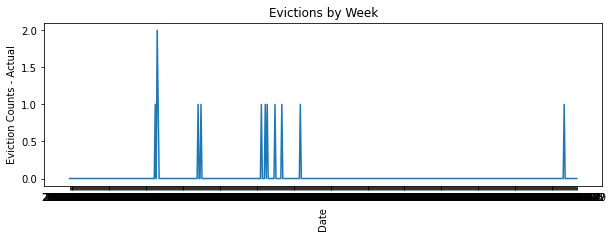

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot()
ax.plot(geoid6['week_dt'],geoid6['count'])

ax.set_xlabel("Date", rotation=90)
ax.set_ylabel("Eviction Counts - Actual")
ax.set_title("Evictions by Week")

In [ ]:
geoid6.head()

,index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201420800,0.0,2010,0,2010-01-03,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
1,1,48201420800,0.0,2010,1,2010-01-10,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
2,2,48201420800,0.0,2010,2,2010-01-17,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
3,3,48201420800,0.0,2010,3,2010-01-24,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0
4,4,48201420800,0.0,2010,4,2010-01-31,177.0,1339.823009,200.0,0.0,0.0,0.0,126.0,0.0


In [32]:
# geoid6.reset_index(inplace=True)
# geoid6 = geoid6.drop('index',axis=1)
# geoid6 = geoid6.drop('Unnamed: 0',axis=1)
geoid6 = geoid6.rename(columns={'index':'week_index'})
geoid6.head()

,week_index,GEOID,count,year,week,week_dt,SE_A03001_003,SE_A18005_001,SE_A06001_005,SE_B18002_002,SE_B18002_003,SE_A08002B_003,SE_A10011_003,SE_A10039B_009
0,0,48201420400,0.0,2010,0,2010-01-03,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
1,1,48201420400,1.0,2010,1,2010-01-10,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
2,2,48201420400,1.0,2010,2,2010-01-17,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
3,3,48201420400,1.0,2010,3,2010-01-24,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0
4,4,48201420400,0.0,2010,4,2010-01-31,229.0,1151.807229,460.0,0.0,0.0,448.0,276.0,92.0


In [36]:
mask = np.random.rand(len(geoid6)) < 0.8

geoid6_train = geoid6[mask]
geoid6_test = geoid6[~mask]
print('Training data set length = '+str(len(geoid6_train)))
print('Testing data set length = '+str(len(geoid6_test)))

Training data set length = 426
Testing data set length = 96


In [33]:
expr = """ count ~ week_index """

In [37]:
y_train6, X_train6 = dmatrices(expr, geoid6_train, return_type='dataframe')
y_test6, X_test6 = dmatrices(expr, geoid6_test, return_type='dataframe')

In [38]:
poisson_training_results6 = sm.GLM(y_train6, X_train6, family=sm.families.Poisson()).fit()

In [39]:
print(poisson_training_results6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  426
Model:                            GLM   Df Residuals:                      424
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -345.90
Date:                Thu, 02 Dec 2021   Deviance:                       451.63
Time:                        18:10:11   Pearson chi2:                     635.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4979      0.141     -3.533      0.0

In [40]:
poisson_predictions6 = poisson_training_results6.get_prediction(X_test6)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame6 = poisson_predictions6.summary_frame()
print(predictions_summary_frame6)

         mean   mean_se  mean_ci_lower  mean_ci_upper
5    0.601387  0.083422       0.458225       0.789278
13   0.591241  0.079938       0.453606       0.770637
23   0.578799  0.075754       0.447839       0.748055
26   0.575117  0.074535       0.446109       0.741434
30   0.570245  0.072937       0.443802       0.732714
..        ...       ...            ...            ...
494  0.212553  0.036406       0.151942       0.297344
505  0.207638  0.036661       0.146898       0.293493
506  0.207197  0.036683       0.146448       0.293146
508  0.206318  0.036727       0.145550       0.292455
520  0.201118  0.036973       0.140272       0.288359

[96 rows x 4 columns]


In [41]:
predicted_counts6 = predictions_summary_frame6['mean']
actual_counts6 = y_test6['count']

# Combined Figures

##  Tracts Forecasts (2, 3, 1)

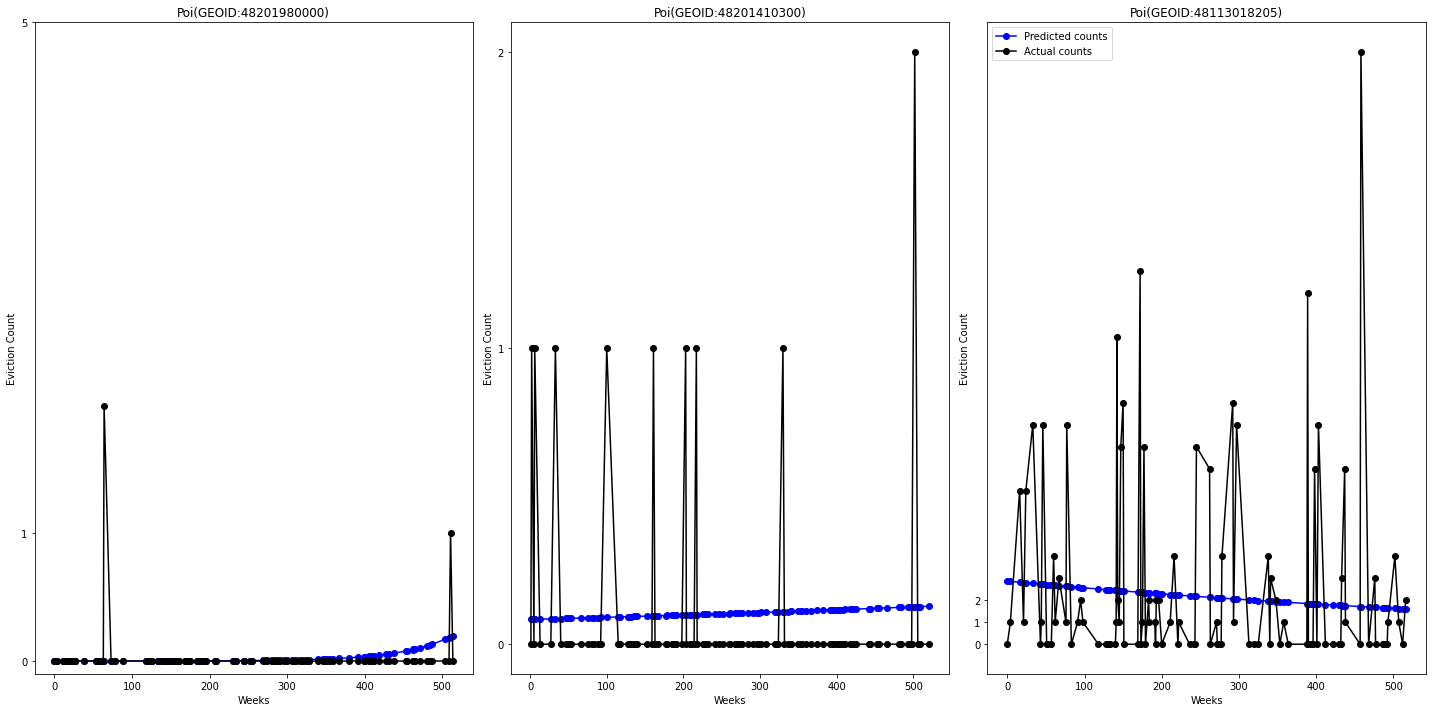

In [ ]:
fig, (tract2, tract3, tract1) = plt.subplots(1,3,figsize=(20,10))

tract1.set_title('Poi(GEOID:48113018205)')
predicted1, = tract1.plot(X_test1.index, predicted_counts1, c='blue', marker='o',label='Predicted counts')
actual1, = tract1.plot(X_test1.index, actual_counts1, c='black', marker='o',label='Actual counts')
tract1.set_xlabel("Weeks")
tract1.set_ylabel("Eviction Count")
tract1.set_yticks([0,2,1])

tract2.set_title('Poi(GEOID:48201980000)')
predicted2, = tract2.plot(X_test2.index, predicted_counts2, c='blue', marker='o',label='Predicted counts')
actual2, = tract2.plot(X_test2.index, actual_counts2, c='black', marker='o',label='Actual counts')
tract2.set_xlabel("Weeks")
tract2.set_ylabel("Eviction Count")
tract2.set_yticks([0,5,1])

tract3.set_title('Poi(GEOID:48201410300)')
predicted3, = tract3.plot(X_test3.index, predicted_counts3, c='blue', marker='o',label='Predicted counts')
actual3, = tract3.plot(X_test3.index, actual_counts3, c='black', marker='o',label='Actual counts')
tract3.set_xlabel("Weeks")
tract3.set_ylabel("Eviction Count")
tract3.set_yticks([0,2,1])



plt.legend(handles=[predicted1, actual1])
plt.tight_layout()
plt.show()

##  Tracts Forecasts (2, 3, 4)


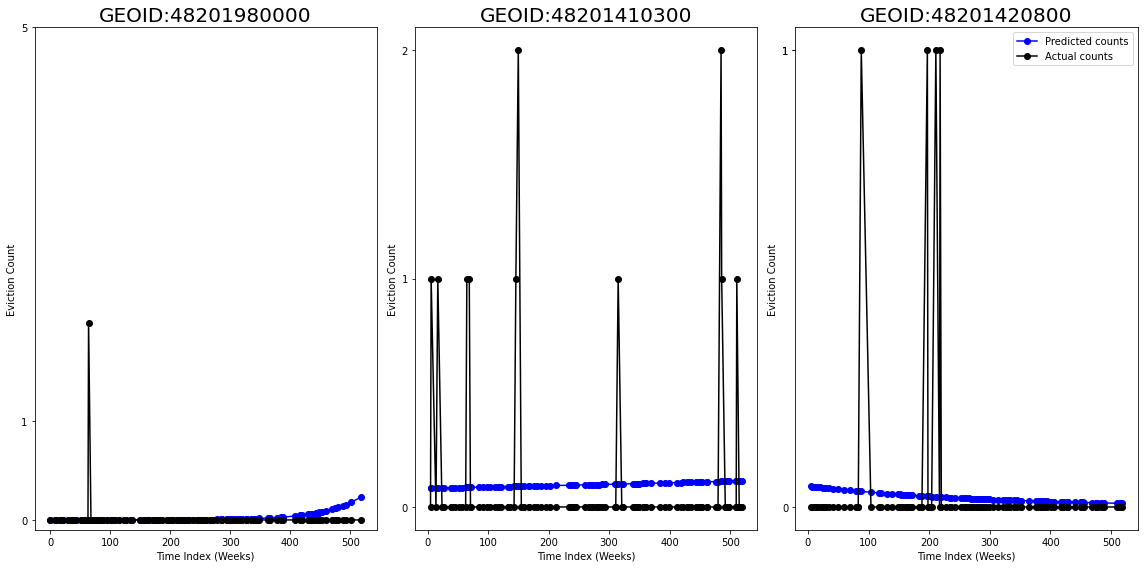

In [ ]:
fig, (tract2, tract3, tract4) = plt.subplots(1,3,figsize=(16,8))

tract2.set_title('GEOID:48201980000', size=20)
predicted2, = tract2.plot(X_test2.index, predicted_counts2, c='blue', marker='o',label='Predicted counts')
actual2, = tract2.plot(X_test2.index, actual_counts2, c='black', marker='o',label='Actual counts')
tract2.set_xlabel("Time Index (Weeks)")
tract2.set_ylabel("Eviction Count")
tract2.set_yticks([0,5,1])

tract3.set_title('GEOID:48201410300', size=20)
predicted3, = tract3.plot(X_test3.index, predicted_counts3, c='blue', marker='o',label='Predicted counts')
actual3, = tract3.plot(X_test3.index, actual_counts3, c='black', marker='o',label='Actual counts')
tract3.set_xlabel("Time Index (Weeks)")
tract3.set_ylabel("Eviction Count")
tract3.set_yticks([0,2,1])

tract4.set_title('GEOID:48201420800', size=20)
predicted4, = tract4.plot(X_test4.index, predicted_counts4, c='blue', marker='o',label='Predicted counts')
actual4, = tract4.plot(X_test4.index, actual_counts4, c='black', marker='o',label='Actual counts')
tract4.set_xlabel("Time Index (Weeks)")
tract4.set_ylabel("Eviction Count")
tract4.set_yticks([0,1,1])

plt.legend(handles=[predicted2, actual2])
plt.tight_layout()
plt.show()

,metric,geoid2,geoid3,geoid4
0,MAE,0.005124,0.106468,0.025509
1,MSE,0.047810,0.101984,0.017149
2,RMSE,0.218655,0.319349,0.130953


##  Tracts Forecasts (5,6)


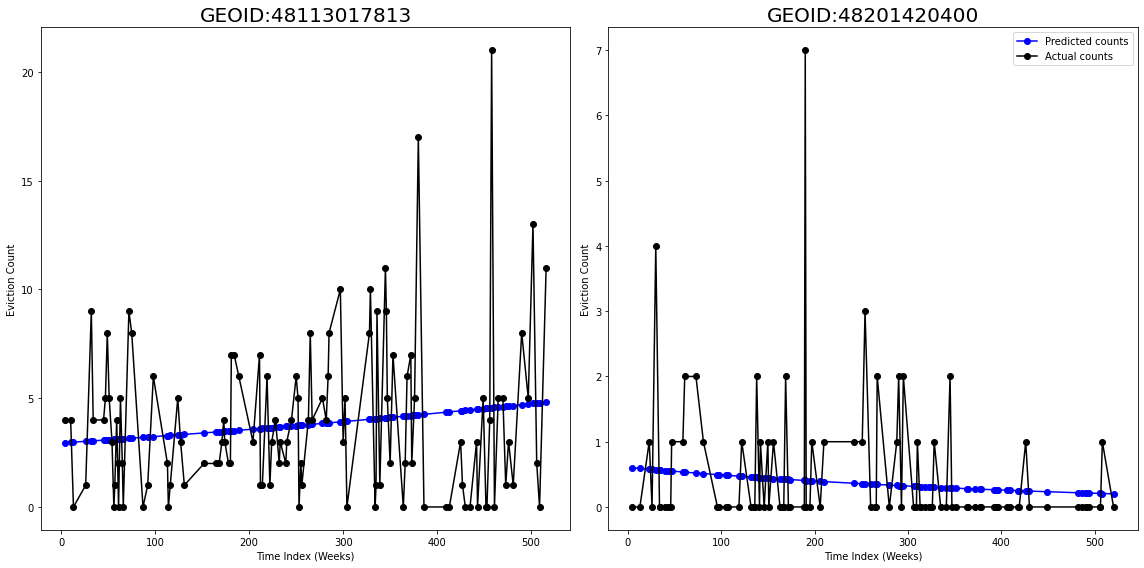

In [43]:
# fig, (tract2, tract3, tract4) = plt.subplots(1,3,figsize=(16,8))
fig, (tract5, tract6) = plt.subplots(1,2,figsize=(16,8))

# tract2.set_title('GEOID:48201980000', size=20)
# predicted2, = tract2.plot(X_test2.index, predicted_counts2, c='blue', marker='o',label='Predicted counts')
# actual2, = tract2.plot(X_test2.index, actual_counts2, c='black', marker='o',label='Actual counts')
# tract2.set_xlabel("Time Index (Weeks)")
# tract2.set_ylabel("Eviction Count")
# tract2.set_yticks([0,5,1])

tract5.set_title('GEOID:48113017813', size=20)
predicted5, = tract5.plot(X_test5.index, predicted_counts5, c='blue', marker='o',label='Predicted counts')
actual5, = tract5.plot(X_test5.index, actual_counts5, c='black', marker='o',label='Actual counts')
tract5.set_xlabel("Time Index (Weeks)")
tract5.set_ylabel("Eviction Count")
# tract5.set_yticks([0,2,1])

tract6.set_title('GEOID:48201420400', size=20)
predicted6, = tract6.plot(X_test6.index, predicted_counts6, c='blue', marker='o',label='Predicted counts')
actual6, = tract6.plot(X_test6.index, actual_counts6, c='black', marker='o',label='Actual counts')
tract6.set_xlabel("Time Index (Weeks)")
tract6.set_ylabel("Eviction Count")
# tract6.set_yticks([0,1,1])

plt.legend(handles=[predicted5, actual5])
plt.tight_layout()
plt.show()

,metric,geoid2,geoid3,geoid4
0,MAE,0.005124,0.106468,0.025509
1,MSE,0.047810,0.101984,0.017149
2,RMSE,0.218655,0.319349,0.130953


# Poisson Performance Metrics
https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

In [46]:
# mae1 = metrics.median_absolute_error(actual_counts1, predicted_counts1)
# mse1 = metrics.mean_squared_error(actual_counts1, predicted_counts1)
# rmse1 = np.sqrt(mse1) # or mse**(0.5)  
# r2 = metrics.r2_score(actual_counts, predicted_counts)

# mae2 = metrics.median_absolute_error(actual_counts2, predicted_counts2)
# mse2 = metrics.mean_squared_error(actual_counts2, predicted_counts2)
# rmse2 = np.sqrt(mse2) # or mse**(0.5)  

# mae3 = metrics.median_absolute_error(actual_counts3, predicted_counts3)
# mse3 = metrics.mean_squared_error(actual_counts3, predicted_counts3)
# rmse3 = np.sqrt(mse3) # or mse**(0.5)  

mae5 = metrics.median_absolute_error(actual_counts5, predicted_counts5)
mse5 = metrics.mean_squared_error(actual_counts5, predicted_counts5)
rmse5 = np.sqrt(mse5) # or mse**(0.5)  

mae6 = metrics.median_absolute_error(actual_counts6, predicted_counts6)
mse6 = metrics.mean_squared_error(actual_counts6, predicted_counts6)
rmse6 = np.sqrt(mse6) # or mse**(0.5)  

## MASE
https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py

https://github.com/scikit-learn/scikit-learn/issues/18685

In [47]:
from sktime.utils.validation.series import check_equal_time_index
from sktime.utils.validation.series import check_time_index
from sktime.utils.validation.forecasting import check_y

ModuleNotFoundError: ignored

In [48]:
!pip install sktime

     |████████████████████████████████| 6.1 MB 6.0 MB/s 
     |████████████████████████████████| 3.3 MB 28.1 MB/s 
     |████████████████████████████████| 9.8 MB 22.2 MB/s 
     |████████████████████████████████| 26.3 MB 1.8 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.8.1 requires statsmodels<=0.12.1, but you have statsmodels 0.13.1 which is incompatible.


In [49]:
def mase(y_test, y_pred, y_train, sp=1):
    """Mean absolute scaled error.
    This scale-free error metric can be used to compare forecast methods on
    a single
    series and also to compare forecast accuracy between series. This metric
    is well
    suited to intermittent-demand series because it never gives infinite or
    undefined
    values.
    Parameters
    ----------
    y_test : pandas Series of shape = (fh,) where fh is the forecasting horizon
        Ground truth (correct) target values.
    y_pred : pandas Series of shape = (fh,)
        Estimated target values.
    y_train : pandas Series of shape = (n_obs,)
        Observed training values.
    sp : int
        Seasonal periodicity of training data.
    Returns
    -------
    loss : float
        MASE loss
    References
    ----------
    ..[1]   Hyndman, R. J. (2006). "Another look at measures of forecast
            accuracy", Foresight, Issue 4.
    """
    # # input checks
    # y_test = check_y(y_test)
    # y_pred = check_y(y_pred)
    # y_train = check_y(y_train)
    # check_equal_time_index(y_test, y_pred)

    # # check if training set is prior to test set
    # if y_train is not None:
    #     check_time_index(y_train.index)
    #     if y_train.index.max() >= y_test.index.min():
    #         raise ValueError(
    #             "Found `y_train` with time index which is not "
    #             "before time index of `y_test`"
    #         )

    #  naive seasonal prediction
    y_train = np.asarray(y_train)
    y_pred_naive = y_train[:-sp]

    # mean absolute error of naive seasonal prediction
    mae_naive = np.mean(np.abs(y_train[sp:] - y_pred_naive))

    # if training data is flat, mae may be zero,
    # return np.nan to avoid divide by zero error
    # and np.inf values
    if mae_naive == 0:
        return np.nan
    else:
        return np.mean(np.abs(y_test - y_pred)) / mae_naive

In [50]:
# mase1 = mase(actual_counts1, predicted_counts1, y_train1, sp=1)
# mase2 = mase(actual_counts2, predicted_counts2, y_train2, sp=1)
# mase3 = mase(actual_counts3, predicted_counts3, y_train3, sp=1)
# mase4 = mase(actual_counts4, predicted_counts4, y_train4, sp=1)
mase5 = mase(actual_counts5, predicted_counts5, y_train5, sp=1)
mase6 = mase(actual_counts6, predicted_counts6, y_train6, sp=1)

In [ ]:
print(mase2, mase3, mase4)

0.6354053868115208 1.073724572504804 1.7637190685073776


## Combined POI results table

In [ ]:
poi_results = pd.DataFrame()
poi_results['metric'] = ['MAE', 'MSE', 'RMSE', 'MASE']
poi_results['geoid2'] =[mae2, mse2, rmse2, mase2]
poi_results['geoid3'] =[mae3, mse3, rmse3, mase3]
poi_results['geoid4'] =[mae4, mse4, rmse4, mase4]
# poi_results['geoid1'] =[mae1, mse1, rmse1, mase1]

In [ ]:
poi_results.head()

,metric,geoid2,geoid3,geoid4
0,MAE,0.002712,0.099997,0.018745
1,MSE,0.036567,0.146572,0.037808
2,RMSE,0.191224,0.382847,0.194443
3,MASE,0.635405,1.073725,1.763719


In [51]:
poi_results1 = pd.DataFrame()
poi_results1['metric'] = ['MAE', 'MSE', 'RMSE', 'MASE']
poi_results1['geoid5'] =[mae5, mse5, rmse5, mase5]
poi_results1['geoid6'] =[mae6, mse6, rmse6, mase6]

In [53]:
poi_results1.head()

,metric,geoid5,geoid6
0,MAE,2.274941,0.426558
1,MSE,13.027070,1.026672
2,RMSE,3.609303,1.013248
3,MASE,0.725956,1.144227
